# Concept of Backtracking

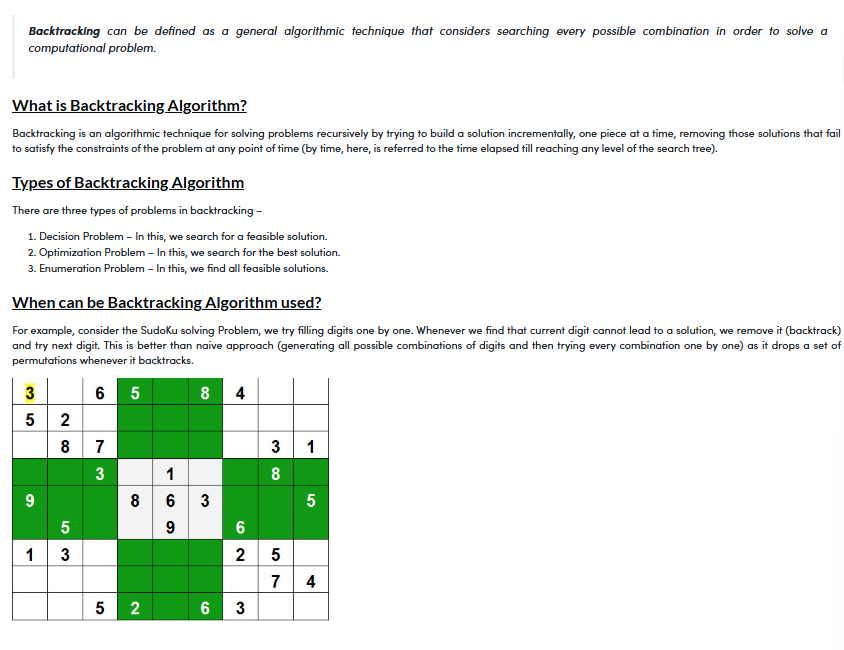

# Rat in a Maze

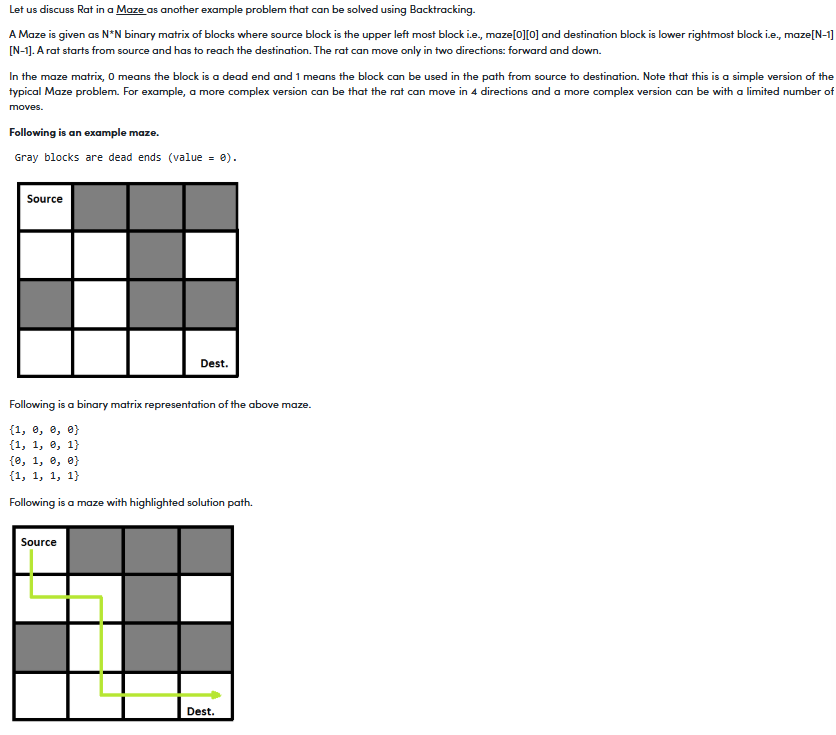

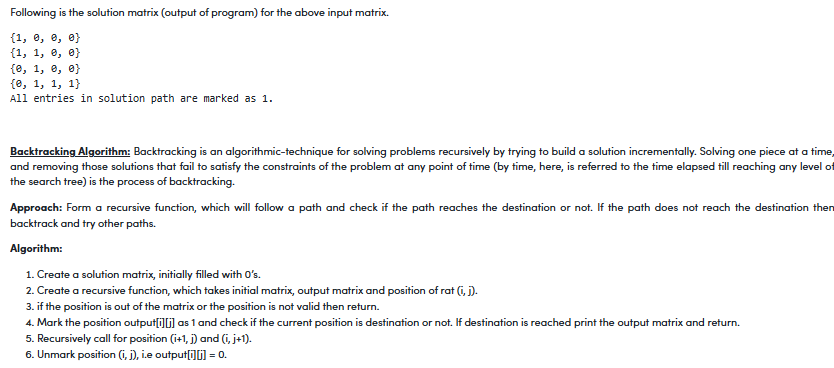

In [1]:
# Python3 program to solve Rat in a Maze
# problem using backtracking

# Maze size
n = 4

# A utility function to check if x, y is valid
# index for N * N Maze


def isValid(n, maze, x, y, res):
	if x >= 0 and y >= 0 and x < n and y < n and maze[x][y] == 1 and res[x][y] == 0:
		return True
	return False

# A recursive utility function to solve Maze problem


def RatMaze(n, maze, move_x, move_y, x, y, res):
	# if (x, y is goal) return True
	if x == n-1 and y == n-1:
		return True
	for i in range(4):
		# Generate new value of x
		x_new = x + move_x[i]

		# Generate new value of y
		y_new = y + move_y[i]

		# Check if maze[x][y] is valid
		if isValid(n, maze, x_new, y_new, res):

			# mark x, y as part of solution path
			res[x_new][y_new] = 1
			if RatMaze(n, maze, move_x, move_y, x_new, y_new, res):
				return True
			res[x_new][y_new] = 0
	return False


def solveMaze(maze):
	# Creating a 4 * 4 2-D list
	res = [[0 for i in range(n)] for i in range(n)]
	res[0][0] = 1

	# x matrix for each direction
	move_x = [-1, 1, 0, 0]

	# y matrix for each direction
	move_y = [0, 0, -1, 1]

	if RatMaze(n, maze, move_x, move_y, 0, 0, res):
		for i in range(n):
			for j in range(n):
				print(res[i][j], end=' ')
			print()
	else:
		print('Solution does not exist')


# Driver program to test above function
if __name__ == "__main__":
	# Initialising the maze
	maze = [[1, 0, 0, 0],
			[1, 1, 0, 1],
			[0, 1, 0, 0],
			[1, 1, 1, 1]]

	solveMaze(maze)

1 0 0 0 
1 1 0 0 
0 1 0 0 
0 1 1 1 


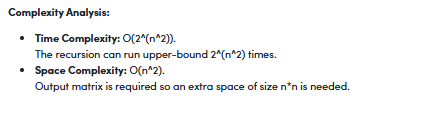

# N Queen Problem

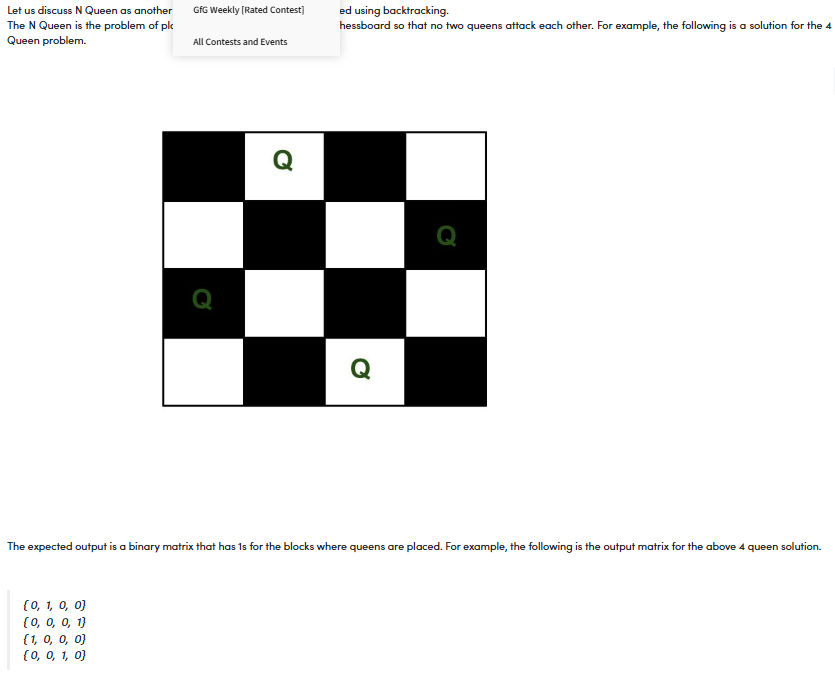

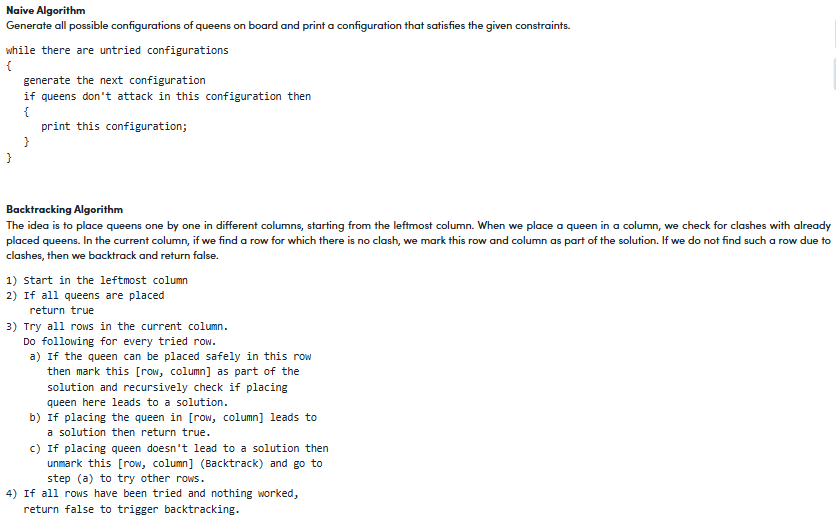

In [2]:
# Python3 program to solve N Queen
# Problem using backtracking
global N
N = 4

def printSolution(board):
	for i in range(N):
		for j in range(N):
			print(board[i][j], end = " ")
		print()

# A utility function to check if a queen can
# be placed on board[row][col]. Note that this
# function is called when "col" queens are
# already placed in columns from 0 to col -1.
# So we need to check only left side for
# attacking queens
def isSafe(board, row, col):

	# Check this row on left side
	for i in range(col):
		if board[row][i] == 1:
			return False

	# Check upper diagonal on left side
	for i, j in zip(range(row, -1, -1),
					range(col, -1, -1)):
		if board[i][j] == 1:
			return False

	# Check lower diagonal on left side
	for i, j in zip(range(row, N, 1),
					range(col, -1, -1)):
		if board[i][j] == 1:
			return False

	return True

def solveNQUtil(board, col):

	# base case: If all queens are placed
	# then return true
	if col >= N:
		return True

	# Consider this column and try placing
	# this queen in all rows one by one
	for i in range(N):

		if isSafe(board, i, col):

			# Place this queen in board[i][col]
			board[i][col] = 1

			# recur to place rest of the queens
			if solveNQUtil(board, col + 1) == True:
				return True

			# If placing queen in board[i][col
			# doesn't lead to a solution, then
			# queen from board[i][col]
			board[i][col] = 0

	# if the queen can not be placed in any row in
	# this column col then return false
	return False

# This function solves the N Queen problem using
# Backtracking. It mainly uses solveNQUtil() to
# solve the problem. It returns false if queens
# cannot be placed, otherwise return true and
# placement of queens in the form of 1s.
# note that there may be more than one
# solutions, this function prints one of the
# feasible solutions.
def solveNQ():
	board = [ [0, 0, 0, 0],
			[0, 0, 0, 0],
			[0, 0, 0, 0],
			[0, 0, 0, 0] ]

	if solveNQUtil(board, 0) == False:
		print ("Solution does not exist")
		return False

	printSolution(board)
	return True

# Driver Code
solveNQ()

0 0 1 0 
1 0 0 0 
0 0 0 1 
0 1 0 0 


True

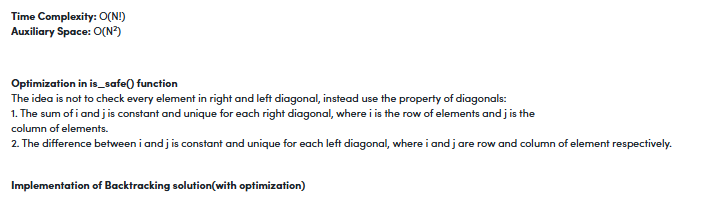

In [3]:
""" Python3 program to solve N Queen Problem using
backtracking """
N = 4

""" ld is an array where its indices indicate row-col+N-1
(N-1) is for shifting the difference to store negative
indices """
ld = [0] * 30

""" rd is an array where its indices indicate row+col
and used to check whether a queen can be placed on
right diagonal or not"""
rd = [0] * 30

"""column array where its indices indicates column and
used to check whether a queen can be placed in that
	row or not"""
cl = [0] * 30

""" A utility function to print solution """
def printSolution(board):
	for i in range(N):
		for j in range(N):
			print(board[i][j], end = " ")
		print()

""" A recursive utility function to solve N
Queen problem """
def solveNQUtil(board, col):

	""" base case: If all queens are placed
		then return True """
	if (col >= N):
		return True

	""" Consider this column and try placing
		this queen in all rows one by one """
	for i in range(N):

		""" Check if the queen can be placed on board[i][col] """
		""" A check if a queen can be placed on board[row][col].
		We just need to check ld[row-col+n-1] and rd[row+coln]
		where ld and rd are for left and right diagonal respectively"""
		if ((ld[i - col + N - 1] != 1 and
			rd[i + col] != 1) and cl[i] != 1):

			""" Place this queen in board[i][col] """
			board[i][col] = 1
			ld[i - col + N - 1] = rd[i + col] = cl[i] = 1

			""" recur to place rest of the queens """
			if (solveNQUtil(board, col + 1)):
				return True

			""" If placing queen in board[i][col]
			doesn't lead to a solution,
			then remove queen from board[i][col] """
			board[i][col] = 0 # BACKTRACK
			ld[i - col + N - 1] = rd[i + col] = cl[i] = 0

			""" If the queen cannot be placed in
			any row in this column col then return False """
	return False

""" This function solves the N Queen problem using
Backtracking. It mainly uses solveNQUtil() to
solve the problem. It returns False if queens
cannot be placed, otherwise, return True and
prints placement of queens in the form of 1s.
Please note that there may be more than one
solutions, this function prints one of the
feasible solutions."""
def solveNQ():
	board = [[0, 0, 0, 0],
			[0, 0, 0, 0],
			[0, 0, 0, 0],
			[0, 0, 0, 0]]
	if (solveNQUtil(board, 0) == False):
		printf("Solution does not exist")
		return False
	printSolution(board)
	return True

# Driver Code
solveNQ()

0 0 1 0 
1 0 0 0 
0 0 0 1 
0 1 0 0 


True

**Time Complexity: O(N!)**

**Auxiliary Space: O(N)**

# Sudoku Problem

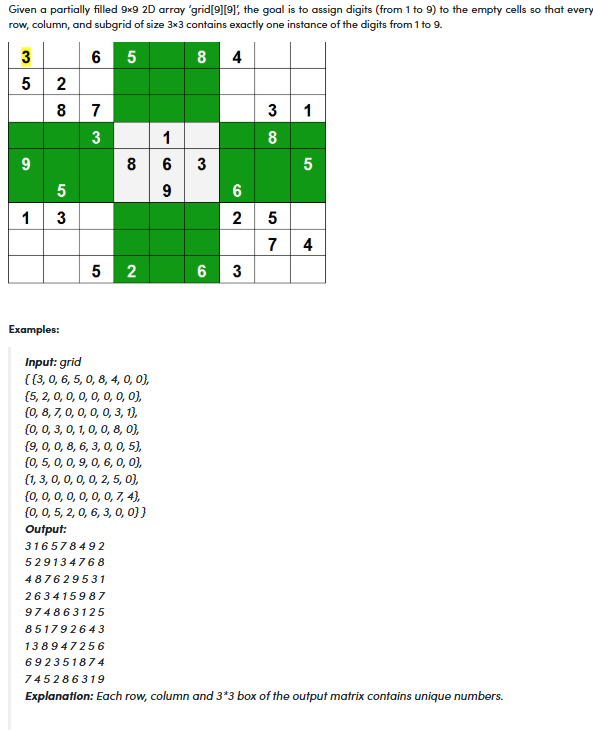

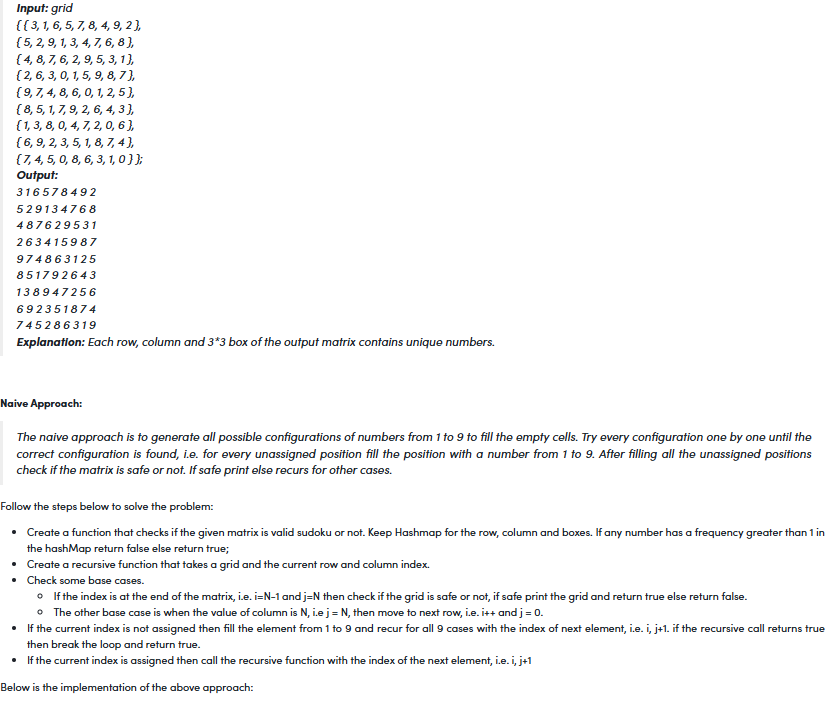

In [4]:
# N is the size of the 2D matrix N*N
N = 9

# A utility function to print grid
def printing(arr):
	for i in range(N):
		for j in range(N):
			print(arr[i][j], end = " ")
		print()

# Checks whether it will be
# legal to assign num to the
# given row, col
def isSafe(grid, row, col, num):

	# Check if we find the same num
	# in the similar row , we
	# return false
	for x in range(9):
		if grid[row][x] == num:
			return False

	# Check if we find the same num in
	# the similar column , we
	# return false
	for x in range(9):
		if grid[x][col] == num:
			return False

	# Check if we find the same num in
	# the particular 3*3 matrix,
	# we return false
	startRow = row - row % 3
	startCol = col - col % 3
	for i in range(3):
		for j in range(3):
			if grid[i + startRow][j + startCol] == num:
				return False
	return True

# Takes a partially filled-in grid and attempts
# to assign values to all unassigned locations in
# such a way to meet the requirements for
# Sudoku solution (non-duplication across rows,
# columns, and boxes) */
def solveSudoku(grid, row, col):

	# Check if we have reached the 8th
	# row and 9th column (0
	# indexed matrix) , we are
	# returning true to avoid
	# further backtracking
	if (row == N - 1 and col == N):
		return True

	# Check if column value becomes 9 ,
	# we move to next row and
	# column start from 0
	if col == N:
		row += 1
		col = 0

	# Check if the current position of
	# the grid already contains
	# value >0, we iterate for next column
	if grid[row][col] > 0:
		return solveSudoku(grid, row, col + 1)
	for num in range(1, N + 1, 1):

		# Check if it is safe to place
		# the num (1-9) in the
		# given row ,col ->we
		# move to next column
		if isSafe(grid, row, col, num):

			# Assigning the num in
			# the current (row,col)
			# position of the grid
			# and assuming our assigned
			# num in the position
			# is correct
			grid[row][col] = num

			# Checking for next possibility with next
			# column
			if solveSudoku(grid, row, col + 1):
				return True

		# Removing the assigned num ,
		# since our assumption
		# was wrong , and we go for
		# next assumption with
		# diff num value
		grid[row][col] = 0
	return False

# Driver Code

# 0 means unassigned cells
grid = [[3, 0, 6, 5, 0, 8, 4, 0, 0],
		[5, 2, 0, 0, 0, 0, 0, 0, 0],
		[0, 8, 7, 0, 0, 0, 0, 3, 1],
		[0, 0, 3, 0, 1, 0, 0, 8, 0],
		[9, 0, 0, 8, 6, 3, 0, 0, 5],
		[0, 5, 0, 0, 9, 0, 6, 0, 0],
		[1, 3, 0, 0, 0, 0, 2, 5, 0],
		[0, 0, 0, 0, 0, 0, 0, 7, 4],
		[0, 0, 5, 2, 0, 6, 3, 0, 0]]

if (solveSudoku(grid, 0, 0)):
	printing(grid)
else:
	print("no solution exists ")

3 1 6 5 7 8 4 9 2 
5 2 9 1 3 4 7 6 8 
4 8 7 6 2 9 5 3 1 
2 6 3 4 1 5 9 8 7 
9 7 4 8 6 3 1 2 5 
8 5 1 7 9 2 6 4 3 
1 3 8 9 4 7 2 5 6 
6 9 2 3 5 1 8 7 4 
7 4 5 2 8 6 3 1 9 


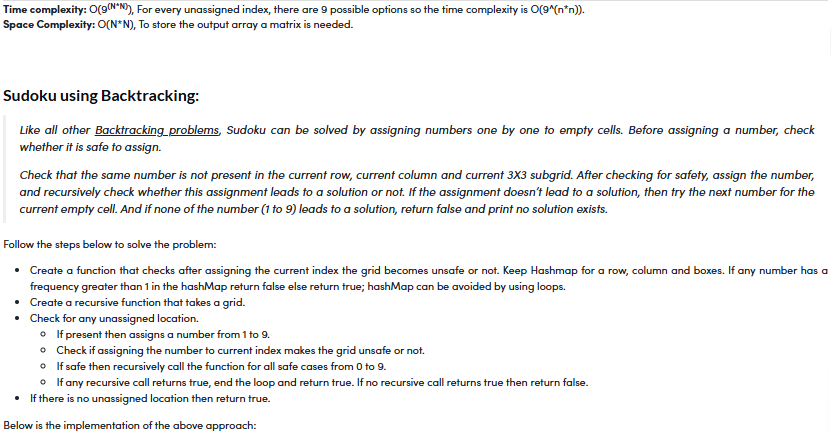

In [6]:
# A Backtracking program
# in Python to solve Sudoku problem

# A Utility Function to print the Grid
def print_grid(arr):
	for i in range(9):
		for j in range(9):
			print (arr[i][j], end = " "),
		print ()


# Function to Find the entry in
# the Grid that is still not used
# Searches the grid to find an
# entry that is still unassigned. If
# found, the reference parameters
# row, col will be set the location
# that is unassigned, and true is
# returned. If no unassigned entries
# remains, false is returned.
# 'l' is a list variable that has
# been passed from the solve_sudoku function
# to keep track of incrementation
# of Rows and Columns
def find_empty_location(arr, l):
	for row in range(9):
		for col in range(9):
			if(arr[row][col]== 0):
				l[0]= row
				l[1]= col
				return True
	return False

# Returns a boolean which indicates
# whether any assigned entry
# in the specified row matches
# the given number.
def used_in_row(arr, row, num):
	for i in range(9):
		if(arr[row][i] == num):
			return True
	return False

# Returns a boolean which indicates
# whether any assigned entry
# in the specified column matches
# the given number.
def used_in_col(arr, col, num):
	for i in range(9):
		if(arr[i][col] == num):
			return True
	return False

# Returns a boolean which indicates
# whether any assigned entry
# within the specified 3x3 box
# matches the given number
def used_in_box(arr, row, col, num):
	for i in range(3):
		for j in range(3):
			if(arr[i + row][j + col] == num):
				return True
	return False

# Checks whether it will be legal
# to assign num to the given row, col
# Returns a boolean which indicates
# whether it will be legal to assign
# num to the given row, col location.
def check_location_is_safe(arr, row, col, num):

	# Check if 'num' is not already
	# placed in current row,
	# current column and current 3x3 box
	return (not used_in_row(arr, row, num) and
		(not used_in_col(arr, col, num) and
		(not used_in_box(arr, row - row % 3,
						col - col % 3, num))))

# Takes a partially filled-in grid
# and attempts to assign values to
# all unassigned locations in such a
# way to meet the requirements
# for Sudoku solution (non-duplication
# across rows, columns, and boxes)
def solve_sudoku(arr):

	# 'l' is a list variable that keeps the
	# record of row and col in
	# find_empty_location Function
	l =[0, 0]

	# If there is no unassigned
	# location, we are done
	if(not find_empty_location(arr, l)):
		return True

	# Assigning list values to row and col
	# that we got from the above Function
	row = l[0]
	col = l[1]

	# consider digits 1 to 9
	for num in range(1, 10):

		# if looks promising
		if(check_location_is_safe(arr,
						row, col, num)):

			# make tentative assignment
			arr[row][col]= num

			# return, if success,
			# ya !
			if(solve_sudoku(arr)):
				return True

			# failure, unmake & try again
			arr[row][col] = 0

	# this triggers backtracking
	return False

# Driver main function to test above functions
if __name__=="__main__":

	# creating a 2D array for the grid
	grid =[[0 for x in range(9)]for y in range(9)]

	# assigning values to the grid
	grid =[[3, 0, 6, 5, 0, 8, 4, 0, 0],
		[5, 2, 0, 0, 0, 0, 0, 0, 0],
		[0, 8, 7, 0, 0, 0, 0, 3, 1],
		[0, 0, 3, 0, 1, 0, 0, 8, 0],
		[9, 0, 0, 8, 6, 3, 0, 0, 5],
		[0, 5, 0, 0, 9, 0, 6, 0, 0],
		[1, 3, 0, 0, 0, 0, 2, 5, 0],
		[0, 0, 0, 0, 0, 0, 0, 7, 4],
		[0, 0, 5, 2, 0, 6, 3, 0, 0]]

	# if success print the grid
	if(solve_sudoku(grid)):
		print_grid(grid)
	else:
		print ("No solution exists")

3 1 6 5 7 8 4 9 2 
5 2 9 1 3 4 7 6 8 
4 8 7 6 2 9 5 3 1 
2 6 3 4 1 5 9 8 7 
9 7 4 8 6 3 1 2 5 
8 5 1 7 9 2 6 4 3 
1 3 8 9 4 7 2 5 6 
6 9 2 3 5 1 8 7 4 
7 4 5 2 8 6 3 1 9 


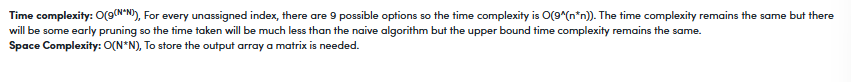